# Rapid Airfoil Analysis with NeuralFoil

This is a brief demo of how [NeuralFoil](https://github.com/peterdsharpe/NeuralFoil) can be used to rapidly analyze airfoils in AeroSandbox.

## Airfoil Definition

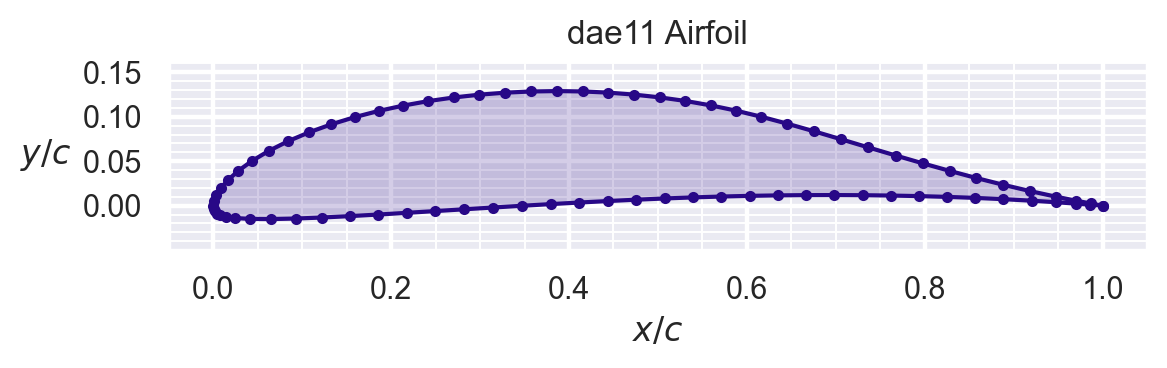

In [1]:
import aerosandbox as asb
import aerosandbox.numpy as np
import matplotlib.pyplot as plt
import aerosandbox.tools.pretty_plots as p

af = asb.Airfoil("dae11")

fig, ax = plt.subplots(figsize=(6, 2))
af.draw()

## Airfoil Analysis

Basic usage:

In [2]:
af.get_aero_from_neuralfoil(
    alpha=5,
    Re=1e6,
    mach=0.2,
)

{'analysis_confidence': array([0.95325772]),
 'CL': array([1.24794257]),
 'CD': array([0.00718001]),
 'CM': array([-0.13385804]),
 'Cpmin': array([-1.6284128]),
 'Top_Xtr': array([0.54944037]),
 'Bot_Xtr': array([0.99459674]),
 'mach_crit': array([0.50016642]),
 'mach_dd': array([0.60788815]),
 'Cpmin_0': array([-1.60432378]),
 'upper_bl_theta_0': array([7.87517855e-05]),
 'upper_bl_theta_1': array([0.00012084]),
 'upper_bl_theta_2': array([0.00015432]),
 'upper_bl_theta_3': array([0.00017942]),
 'upper_bl_theta_4': array([0.00020126]),
 'upper_bl_theta_5': array([0.00022079]),
 'upper_bl_theta_6': array([0.00023896]),
 'upper_bl_theta_7': array([0.00025661]),
 'upper_bl_theta_8': array([0.00027451]),
 'upper_bl_theta_9': array([0.00029412]),
 'upper_bl_theta_10': array([0.00031495]),
 'upper_bl_theta_11': array([0.000335]),
 'upper_bl_theta_12': array([0.00035322]),
 'upper_bl_theta_13': array([0.00036965]),
 'upper_bl_theta_14': array([0.00038565]),
 'upper_bl_theta_15': array([0.000

There's a lot of output here, but the main ones you'll be interested in are:
- `analysis_confidence`: Probability that the airfoil and flow conditions would produce similar results if analyzed in XFoil. Expressed as a probability, 0 to 1. Generally, results above >0.9 are quite reliable; maybe down to 0.8 if you're feeling adventurous.
- `CL`: Lift coefficient
- `CD`: Drag coefficient
- `CM`: Moment coefficient
- `Top_Xtr`: Top-side boundary layer transition location, as a fraction of chord
- `Bot_Xtr`: Bottom-side boundary layer transition location, as a fraction of chord
- `mach_crit`: Critical Mach number; the lowest Mach number at which supersonic flow would appear (at these flow conditions)

Advanced usage, showing a few more inputs: control surfaces, boundary layer control, and varying model sizes:

In [3]:
af.get_aero_from_neuralfoil(
    alpha=5,
    Re=1e6,
    mach=0.2,
    n_crit=5,  # Critical amplification factor for transition prediction; see XFoil docs for more details
    xtr_upper=0.10,  # Location of a forced top-side BL trip, as a fraction of chord
    xtr_lower=1.00,  # Location of a forced bottom-side BL trip, as a fraction of chord
    model_size="xxxlarge",  # Can be "xsmall", "small", "medium", "large", "xlarge", "xxlarge", or "xxxlarge"
    control_surfaces=[
        asb.ControlSurface(
            name="aileron",
            deflection=10,  # Positive is trailing-edge down
            hinge_point=0.75,
        )
    ],
)

{'analysis_confidence': array([0.91055189]),
 'CL': array([1.57463341]),
 'CD': array([0.04062482]),
 'CM': array([-0.11097897]),
 'Cpmin': array([-2.72479686]),
 'Top_Xtr': array([0.10545975]),
 'Bot_Xtr': array([1.00351867]),
 'mach_crit': array([0.41347274]),
 'mach_dd': array([0.52119447]),
 'Cpmin_0': array([-2.68448909]),
 'upper_bl_theta_0': array([9.6691517e-05]),
 'upper_bl_theta_1': array([0.00014725]),
 'upper_bl_theta_2': array([0.00018082]),
 'upper_bl_theta_3': array([0.00020847]),
 'upper_bl_theta_4': array([0.00030464]),
 'upper_bl_theta_5': array([0.00038587]),
 'upper_bl_theta_6': array([0.00047497]),
 'upper_bl_theta_7': array([0.00056696]),
 'upper_bl_theta_8': array([0.00066091]),
 'upper_bl_theta_9': array([0.00075943]),
 'upper_bl_theta_10': array([0.00085917]),
 'upper_bl_theta_11': array([0.00095778]),
 'upper_bl_theta_12': array([0.00106042]),
 'upper_bl_theta_13': array([0.0011779]),
 'upper_bl_theta_14': array([0.00131391]),
 'upper_bl_theta_15': array([0.00

Vectorized usage:

In [4]:
af.get_aero_from_neuralfoil(
    alpha=np.array([0, 5, 10, 15]),
    Re=1e6,
    mach=0.2,
)

{'analysis_confidence': array([0.96378268, 0.95325772, 0.95495232, 0.96529798]),
 'CL': array([0.67277886, 1.24794257, 1.71071653, 1.71175074]),
 'CD': array([0.00779871, 0.00718001, 0.01550581, 0.06057373]),
 'CM': array([-0.12876585, -0.13385804, -0.12907356, -0.10914887]),
 'Cpmin': array([-1.16816175, -1.6284128 , -2.93036065, -3.89243609]),
 'Top_Xtr': array([0.61888592, 0.54944037, 0.30137903, 0.04924477]),
 'Bot_Xtr': array([0.18447208, 0.99459674, 1.00009291, 0.99912933]),
 'mach_crit': array([0.55799093, 0.50016642, 0.40175924, 0.35773215]),
 'mach_dd': array([0.66571267, 0.60788815, 0.50948097, 0.46545389]),
 'Cpmin_0': array([-1.15088119, -1.60432378, -2.88701198, -3.83485548]),
 'upper_bl_theta_0': array([7.13464390e-05, 7.87517855e-05, 9.46823490e-05, 1.07499499e-04]),
 'upper_bl_theta_1': array([0.00010286, 0.00012084, 0.00014208, 0.00016544]),
 'upper_bl_theta_2': array([0.00013161, 0.00015432, 0.00017655, 0.0002647 ]),
 'upper_bl_theta_3': array([0.00015541, 0.00017942,

Note that vectorization must be with 1D arrays. You can flatten higher-dimensional arrays to achieve this.

For example, this shows vectorized analysis across a 2D grid in angle of attack and Reynolds number:

In [5]:
af = asb.Airfoil("naca4412")

alpha = np.linspace(-10, 18, 181)
re = np.geomspace(1e4, 1e8, 5)

Alpha, Re = np.meshgrid(alpha, re)

aero_flattened = af.get_aero_from_neuralfoil(
    alpha=Alpha.flatten(),
    Re=Re.flatten(),
    mach=0,
    model_size="xxxlarge",
)
Aero = {key: value.reshape(Alpha.shape) for key, value in aero_flattened.items()}

We can plot the results:

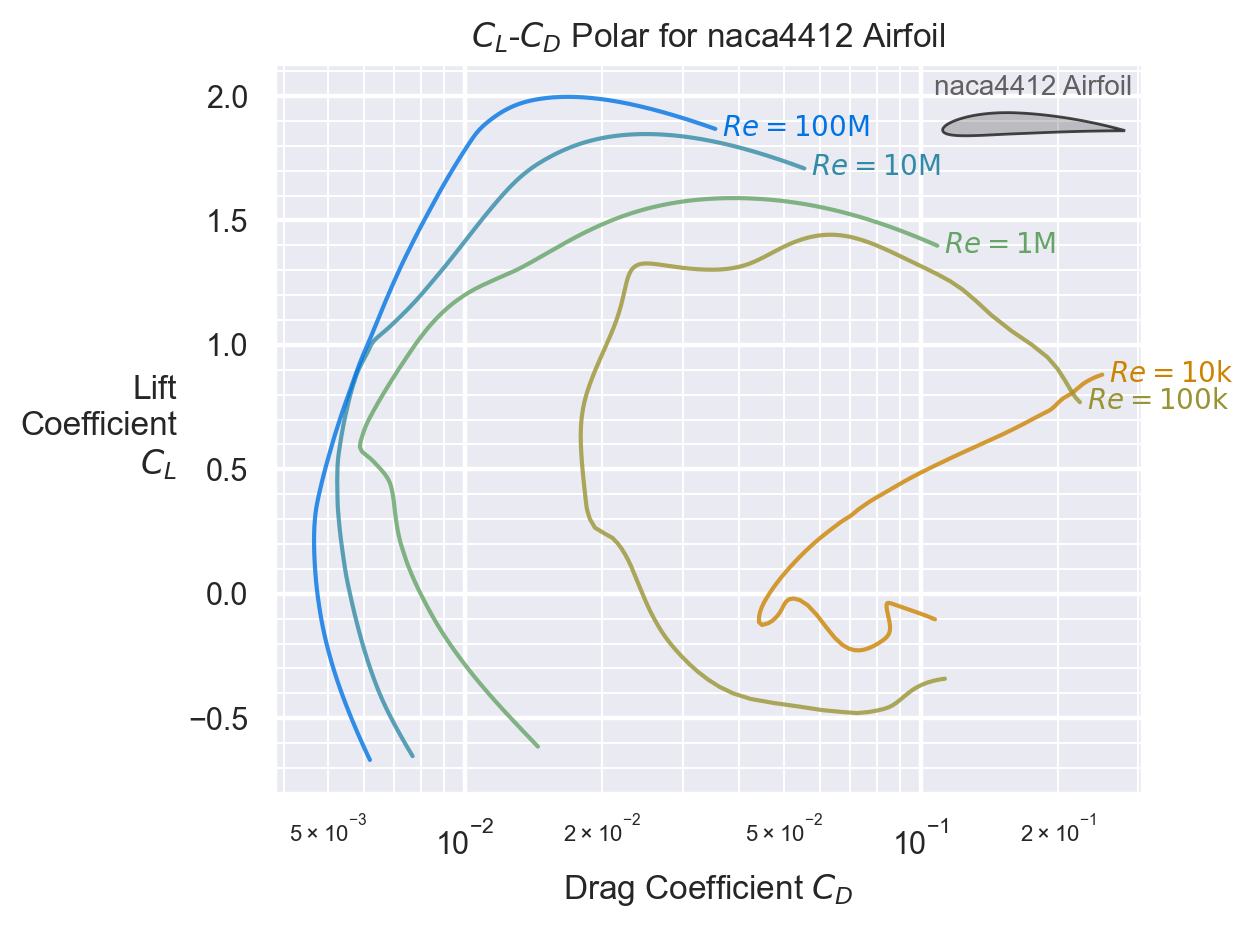

In [6]:
from matplotlib.colors import LinearSegmentedColormap
from aerosandbox.tools.string_formatting import eng_string

fig, ax = plt.subplots()
colors = LinearSegmentedColormap.from_list(
    "custom_cmap",
    colors=[
        p.adjust_lightness(c, 0.8) for c in ["orange", "darkseagreen", "dodgerblue"]
    ],
)(np.linspace(0, 1, len(re)))

for i in range(len(re)):
    (line,) = ax.plot(
        Aero["CD"][i, :],
        Aero["CL"][i, :],
        color=colors[i],
        alpha=0.8,
    )

    plt.annotate(
        f" $Re = \\mathrm{{{eng_string(re[i])}}}$",
        xy=(line.get_xdata()[-1], line.get_ydata()[-1]),
        color=colors[i],
        ha="left",
        va="center",
        fontsize=10,
    )

afax = ax.inset_axes([0.76, 0.802, 0.23, 0.23])
afax.fill(
    af.x(), af.y(), facecolor=(0, 0, 0, 0.2), linewidth=1, edgecolor=(0, 0, 0, 0.7)
)
afax.annotate(
    text=f"{af.name} Airfoil\n",
    xy=(0.5, 0),
    ha="center",
    va="bottom",
    fontsize=10,
    alpha=0.7,
)
afax.axis("off")
afax.axis("equal")

plt.xscale("log")
p.show_plot(
    title=f"$C_L$-$C_D$ Polar for {af.name} Airfoil",
    xlabel="Drag Coefficient $C_D$",
    ylabel="Lift Coefficient $C_L$",
)

## Post-Stall Airfoil Analysis

Neuralfoil returns reasonably-accurate results for a 360 degree angle of attack range:

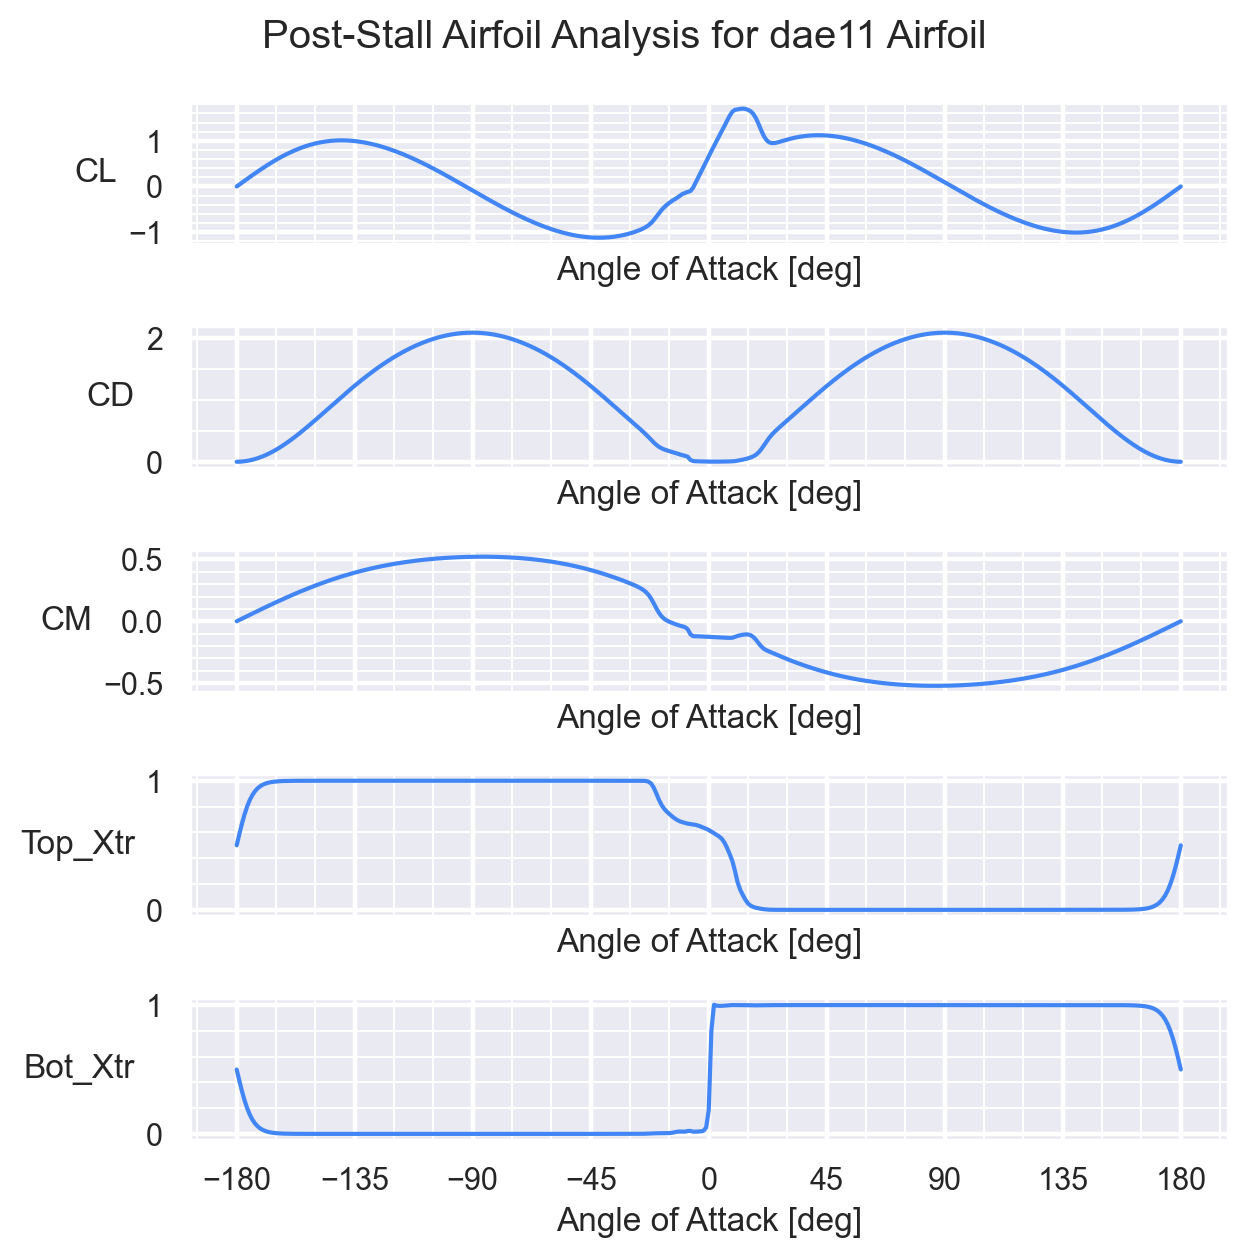

In [7]:
af = asb.Airfoil("dae11")

alpha = np.linspace(-180, 180, 361)
aero = af.get_aero_from_neuralfoil(
    alpha=alpha,
    Re=1e6,
    mach=0,
)

keys_to_plot = ["CL", "CD", "CM", "Top_Xtr", "Bot_Xtr"]

fig, ax = plt.subplots(len(keys_to_plot), 1, figsize=(6.4, 6.4), sharex=True)
for i, key in enumerate(keys_to_plot):
    plt.sca(ax[i])
    plt.plot(
        alpha,
        aero[key],
    )
    plt.ylabel(key)
    p.set_ticks(45, 15)
    from matplotlib.ticker import AutoMinorLocator

    ax[i].yaxis.set_minor_locator(AutoMinorLocator())

p.show_plot(
    title=f"Post-Stall Airfoil Analysis for {af.name} Airfoil",
    xlabel="Angle of Attack [deg]",
    set_ticks=False,
)

## Transonic Airfoil Analysis

Compressible aerodynamics are computed using a Laitone-rule (higher-order version of Prandtl-Glauert or Karman-Tsien) correction. The basic chain of computation here is:
1. NeuralFoil predicts `Cpmin_0` (see key in the dictionary), which is the minimum pressure coefficient on the airfoil at incompressible conditions. This is a function of the airfoil shape, angle of attack, and Reynolds number.
2. We figure out at which Mach number these two quantities equal:
  - The Laitone-rule-corrected compressible `Cpmin`, based on `Cpmin_0`.
  - The sonic pressure coefficient, which is a function of the Mach number.
  It turns out that solving for the Mach number that causes these two value to be equal does not admit closed-form solution. Instead, we use a pre-computed symbolic-regression-derived solution to this implicit relation. (This "fit" introduces near-zero error.) This Mach number is then considered the critical Mach number
3. In parallel with the previous step, $C_L$, $C_D$, and $C_M$ coefficients are corrected using a Laitone-rule correction up to the specified Mach number. An empirically-tuned modification of the $\beta = \sqrt{1 - M^2}$ resolves the singularity at $M = 1$, and parameters of this modification were pre-computed to best match known calibration data derived from wind tunnel experiment.
4. If the specified Mach number exceeds the critical Mach number, wave drag and a buffet model are applied.


This NeuralFoil-based procedure does a surprisingly accurate (+- 0.01 Mach, typically) job of predicting $M_{crit}$, and this $M_{crit}$ value is directly accessible for any airfoil:

In [8]:
af = asb.Airfoil("rae2822")

aero = af.get_aero_from_neuralfoil(alpha=2.31, Re=6.5e6, mach=0.729)
aero["mach_crit"]

array([0.57557534])

We can also plot the compressible aerodynamics, :

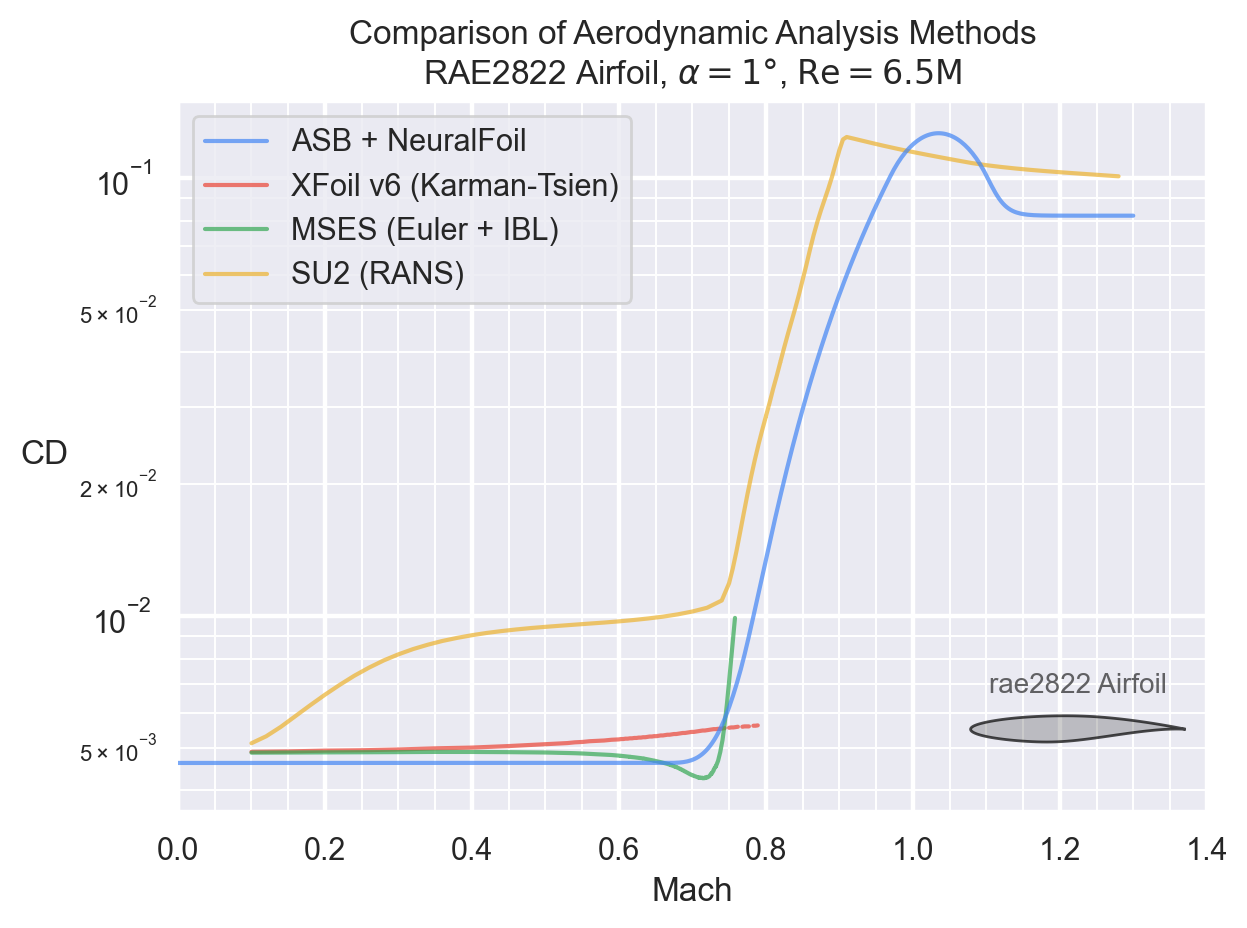

In [9]:
import json
from pathlib import Path

data_folder = Path(".") / "assets" / "RAE2822_alpha_1deg_Re_6500000"


def get_data(filename):
    with open(filename) as f:
        data = f.readlines()

    data = [json.loads(line) for line in data]

    data = {k: np.array([d[k] for d in data]) for k in data[0].keys()}

    order = np.argsort(data["mach"])

    data = {k: v[order] for k, v in data.items()}

    return data


machs = np.linspace(0, 1.3, 500)
airfoil = asb.Airfoil("rae2822")
asb_aero = airfoil.get_aero_from_neuralfoil(1, 6.5e6, machs)
asb_aero["mach"] = machs

datas = {
    "ASB + NeuralFoil": asb_aero,
    "XFoil v6 (Karman-Tsien)": get_data(data_folder / "xfoil6.csv"),
    "MSES (Euler + IBL)": get_data(data_folder / "mses.csv"),
    "SU2 (RANS)": get_data(data_folder / "su2.csv"),
}

fig, ax = plt.subplots()

x = "mach"
y = "CD"

for label, data in datas.items():
    plt.plot(
        data[x], data[y], label=label, alpha=0.7, zorder=4 if "ASB" in label else 3
    )

afax = ax.inset_axes([0.76, 0, 0.23, 0.23])
afax.fill(
    af.x(), af.y(), facecolor=(0, 0, 0, 0.2), linewidth=1, edgecolor=(0, 0, 0, 0.7)
)
afax.annotate(
    text=f"{af.name} Airfoil\n",
    xy=(0.5, 0),
    ha="center",
    va="bottom",
    fontsize=10,
    alpha=0.7,
)
afax.axis("off")
afax.axis("equal")

plt.xlim(0, 1.4)
plt.yscale("log")

p.show_plot(
    "Comparison of Aerodynamic Analysis Methods\nRAE2822 Airfoil, $\\alpha=1\\degree$, $\\mathrm{Re}=6.5\\mathrm{M}$",
    x.capitalize(),
    y,
)

And, if you're interested in studying interesting interactions between low-Reynolds and high-Mach aerodynamics, you can do that too. This figure below shows the best-achievable $L/D$ (at any angle of attack) as a function of Reynolds number and Mach number for a given airfoil.

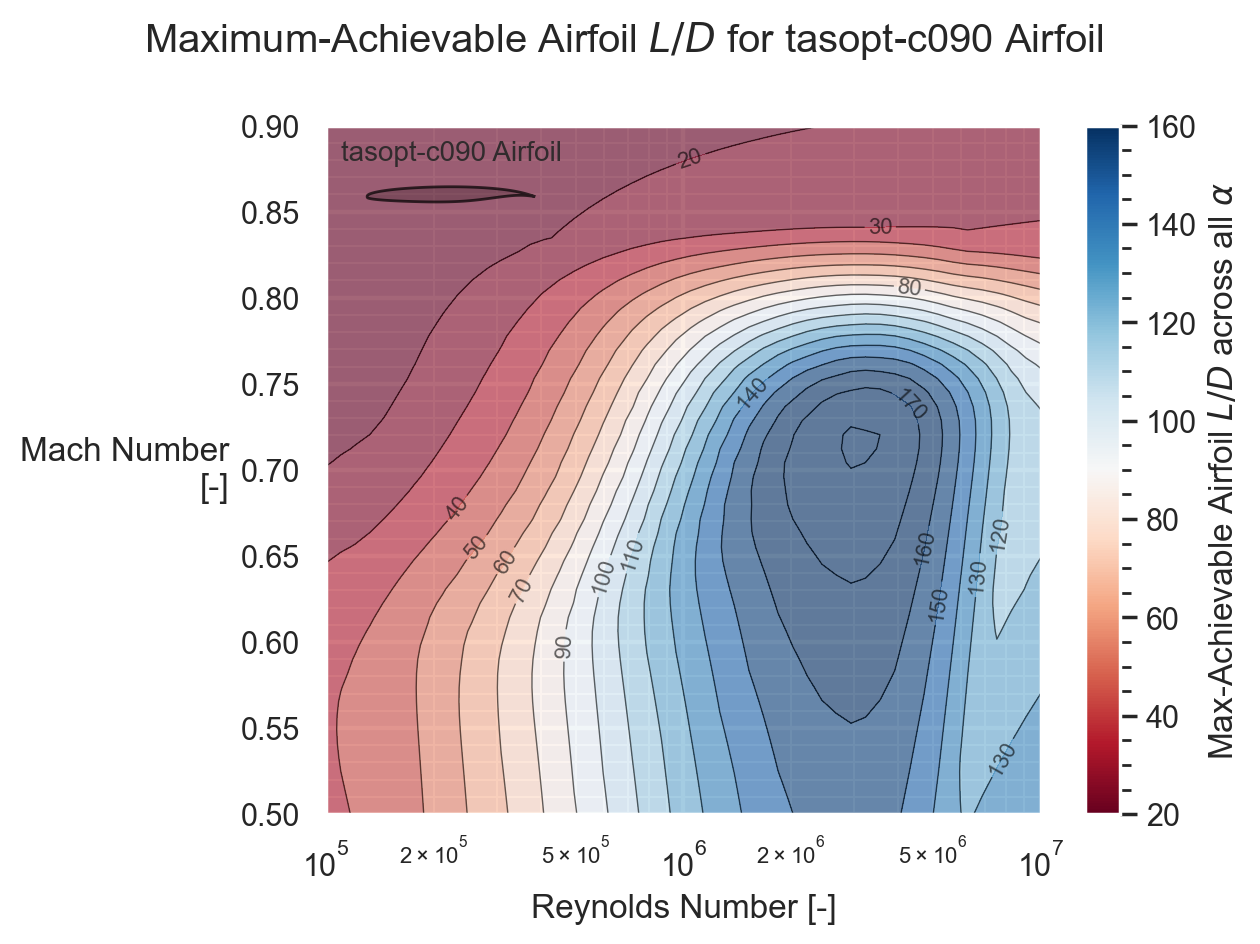

In [10]:
af = asb.Airfoil("tasopt-c090")

re = np.geomspace(1e5, 1e7, 50)
mach = np.linspace(0.5, 0.9, 50)
alpha = np.linspace(-3, 7, 50)

Re, Mach, Alpha = np.meshgrid(re, mach, alpha)

aero_f = af.get_aero_from_neuralfoil(
    alpha=Alpha.flatten(),
    Re=Re.flatten(),
    mach=Mach.flatten(),
)
aero = {k: np.reshape(v, Re.shape) for k, v in aero_f.items()}

fig, ax = plt.subplots()

LD = np.max(aero["CL"] / aero["CD"], axis=-1)

p.contour(
    re,
    mach,
    LD,
    levels=np.arange(0, 400, 10),
    x_log_scale=True,
    cmap="RdBu",
    alpha=0.6,
    colorbar_label="Max-Achievable Airfoil $L/D$ across all $\\alpha$",
)
plt.clim(20, 160)
plt.xscale("log")

afax = ax.inset_axes([0.05, 0.8, 0.25, 0.20])
afax.fill(
    af.x(), af.y(), facecolor=(0, 0, 0, 0.2), linewidth=1, edgecolor=(0, 0, 0, 0.7)
)
afax.annotate(
    text=f"{af.name} Airfoil\n",
    xy=(0.5, 0),
    ha="center",
    va="bottom",
    fontsize=10,
    alpha=0.9,
)
afax.axis("off")
afax.axis("equal")

p.show_plot(
    title=f"Maximum-Achievable Airfoil $L/D$ for {af.name} Airfoil",
    xlabel="Reynolds Number [-]",
    ylabel="Mach Number [-]",
)